### **`Business Understanding`**

**Objective**: Predict changes in the price index based on historical prices of Bitcoin, oil, and gold, along with other related features (e.g., DXY index).

**Key Questions:**
1. How are Bitcoin, oil, and gold prices related to changes in the price index?
2. Can external features like holidays, weekdays, or DXY influence the model's predictions?
3. What insights can the model provide for portfolio management or market forecasting?

### **`Data Understanding`**

### **Importattion of Packages**

In [1]:
# Descriptive Analytics Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Analysis Packages
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning Packages
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor , XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import shap
from sklearn.inspection import PartialDependenceDisplay



# Data Manipulations & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preparation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.decomposition import PCA

# from imblearn.pipeline import Pipeline as imbpipeline
# from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay

#Model Persistance
import joblib


#Utilities
import warnings
sns.set_style('darkgrid')
import os

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

In [3]:
# Get the current directory of the script
current_dir = os.getcwd()

# Go back one folder and then to 'datasets'
csv_path = os.path.join(current_dir, "..", "datasets", "final_dataset.csv")

# Normalize the path for platform independence
csv_path = os.path.normpath(csv_path)

In [4]:
df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,Date,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_close,oil_open,oil_high,oil_low,gold_close,gold_open,gold_high,gold_low,dxy_close,dxy_open,dxy_high,dxy_low,IS_HOLIDAY,IS_WEEKDAY,Title
0,3652,2024-10-31,Thursday,10,2024,NaN,NaN,NaN,NaN,69.26,69.10,70.81,68.30,"2,749.30","2,799.10","2,801.20","2,741.80",103.98,104.08,104.22,103.82,0.0,1,NaN
1,3651,2024-10-30,Wednesday,10,2024,NaN,NaN,NaN,NaN,68.61,67.47,69.17,67.28,"2,800.80","2,786.90","2,801.80","2,782.40",103.99,104.25,104.44,103.98,0.0,1,NaN
2,3650,2024-10-29,Tuesday,10,2024,NaN,NaN,NaN,NaN,67.21,68.02,68.52,66.72,"2,768.80","2,741.90","2,773.20","2,741.90",104.32,104.31,104.64,104.21,0.0,1,NaN
3,3649,2024-10-28,Monday,10,2024,NaN,NaN,NaN,NaN,67.38,68.98,69.00,66.92,"2,755.90","2,749.20","2,758.30","2,736.90",104.32,104.32,104.57,104.12,0.0,1,NaN
4,3648,2024-10-27,Sunday,10,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN


### **Exploratory Data Analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3653 non-null   int64  
 1   Date        3653 non-null   object 
 2   DoW         3653 non-null   object 
 3   Month       3653 non-null   int64  
 4   Year        3653 non-null   int64  
 5   btc_open    3643 non-null   float64
 6   btc_high    3643 non-null   float64
 7   btc_low     3643 non-null   float64
 8   btc_close   3643 non-null   float64
 9   oil_close   2637 non-null   float64
 10  oil_open    2637 non-null   float64
 11  oil_high    2637 non-null   float64
 12  oil_low     2637 non-null   float64
 13  gold_close  2564 non-null   object 
 14  gold_open   2564 non-null   object 
 15  gold_high   2564 non-null   object 
 16  gold_low    2564 non-null   object 
 17  dxy_close   2610 non-null   float64
 18  dxy_open    2610 non-null   float64
 19  dxy_high    2610 non-null  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3653.0,1826.000000,1054.674594,0.00,913.0000,1826.000,2739.0000,3652.00
Month,3653.0,6.522310,3.449345,1.00,4.0000,7.000,10.0000,12.00
Year,3653.0,2019.333425,2.897193,2014.00,2017.0000,2019.000,2022.0000,2024.00
btc_open,3643.0,18449.732976,20039.914540,176.90,1319.8550,9314.130,29848.5850,73079.38
btc_high,3643.0,18865.656794,20480.738577,211.73,1339.5950,9466.350,30391.1100,73750.07
btc_low,3643.0,18008.726780,19563.811246,171.51,1315.0650,9149.390,29307.6250,71334.09
btc_close,3643.0,18467.017137,20052.330675,178.10,1334.8400,9316.630,29859.7400,73083.50
oil_close,2637.0,61.870300,17.522667,11.57,48.7000,59.640,74.1300,119.78
oil_open,2637.0,61.894638,17.514253,18.01,48.7900,59.650,74.1800,120.66
oil_high,2637.0,62.903367,17.769240,19.66,49.4600,60.500,75.3100,126.42


#### **Data Cleaning**

In [7]:
df.drop(columns='Unnamed: 0', inplace=True)

In [8]:
df.isna().sum()

Date             0
DoW              0
Month            0
Year             0
btc_open        10
btc_high        10
btc_low         10
btc_close       10
oil_close     1016
oil_open      1016
oil_high      1016
oil_low       1016
gold_close    1089
gold_open     1089
gold_high     1089
gold_low      1089
dxy_close     1043
dxy_open      1043
dxy_high      1043
dxy_low       1043
IS_HOLIDAY       0
IS_WEEKDAY       0
Title         3549
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Date'].min(), df['Date'].max()

(Timestamp('2014-11-01 00:00:00'), Timestamp('2024-10-31 00:00:00'))

In [11]:
numeric_columns = ['gold_open', 'gold_high', 'gold_low', 'gold_close'] 
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')


##### **Rearranging columns for easier analysis**

In [12]:
df.columns

Index(['Date', 'DoW', 'Month', 'Year', 'btc_open', 'btc_high', 'btc_low',
       'btc_close', 'oil_close', 'oil_open', 'oil_high', 'oil_low',
       'gold_close', 'gold_open', 'gold_high', 'gold_low', 'dxy_close',
       'dxy_open', 'dxy_high', 'dxy_low', 'IS_HOLIDAY', 'IS_WEEKDAY', 'Title'],
      dtype='object')

In [13]:
new_column_order = ['Date', 'DoW', 'Month', 'Year', 
                    'btc_open', 'btc_high', 'btc_low','btc_close',
                    'oil_open', 'oil_high', 'oil_low', 'oil_close', 
                    'gold_open', 'gold_high', 'gold_low', 'gold_close',
                    'dxy_open', 'dxy_high', 'dxy_low', 'dxy_close', 
                    'IS_HOLIDAY', 'IS_WEEKDAY', 'Title']

df = df[new_column_order]

In [14]:
df.rename(columns={'Title': 'Holiday_Name'}, inplace=True)

In [15]:
df.head()

,Date,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,oil_close,gold_open,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name
0,2024-10-31,Thursday,10,2024,NaN,NaN,NaN,NaN,69.10,70.81,68.30,69.26,2799.1,2801.2,2741.8,2749.3,104.08,104.22,103.82,103.98,0.0,1,NaN
1,2024-10-30,Wednesday,10,2024,NaN,NaN,NaN,NaN,67.47,69.17,67.28,68.61,2786.9,2801.8,2782.4,2800.8,104.25,104.44,103.98,103.99,0.0,1,NaN
2,2024-10-29,Tuesday,10,2024,NaN,NaN,NaN,NaN,68.02,68.52,66.72,67.21,2741.9,2773.2,2741.9,2768.8,104.31,104.64,104.21,104.32,0.0,1,NaN
3,2024-10-28,Monday,10,2024,NaN,NaN,NaN,NaN,68.98,69.00,66.92,67.38,2749.2,2758.3,2736.9,2755.9,104.32,104.57,104.12,104.32,0.0,1,NaN
4,2024-10-27,Sunday,10,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN


#### **Distribution Analysis**

[]

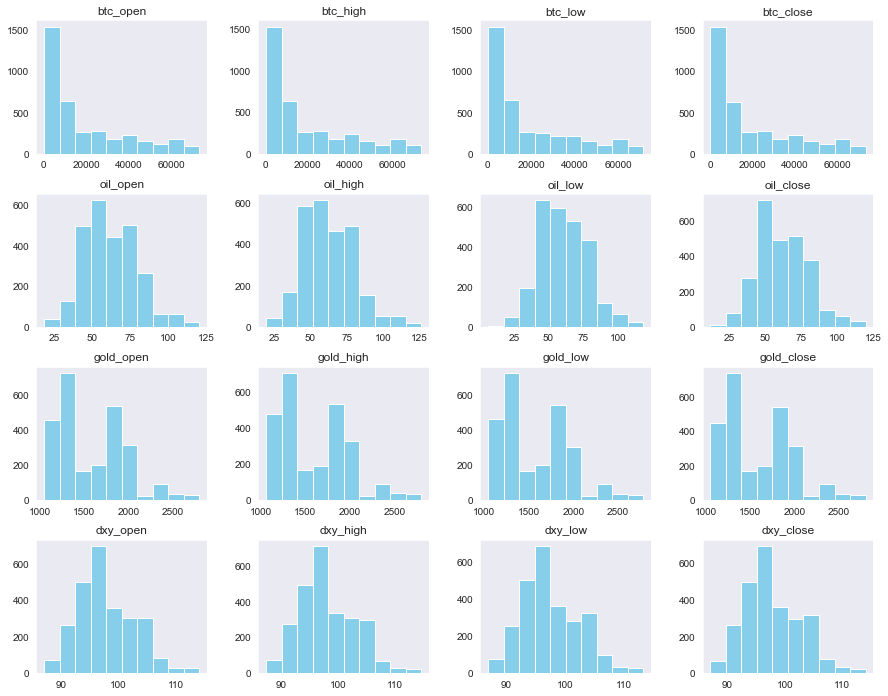

In [16]:
df.drop(columns=['Date', 'Month', 'Year', 'IS_HOLIDAY', 'IS_WEEKDAY']).hist(grid=False, color='skyblue', figsize=(15, 12) )
plt.plot()

#### **Correlation Analysis**

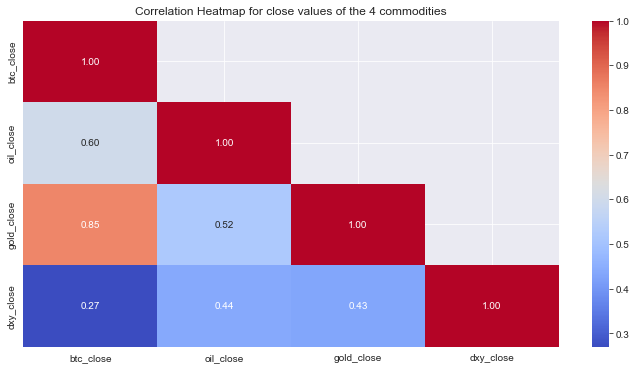

In [17]:
correlation_matrix = df[['btc_close', 'oil_close', 'gold_close', 'dxy_close']].corr().round(2)

# Modify the mask to exclude the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plot the heatmap with the modified mask to include the diagonal
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap for close values of the 4 commodities")
plt.show()

#### **Time Series Analysis**

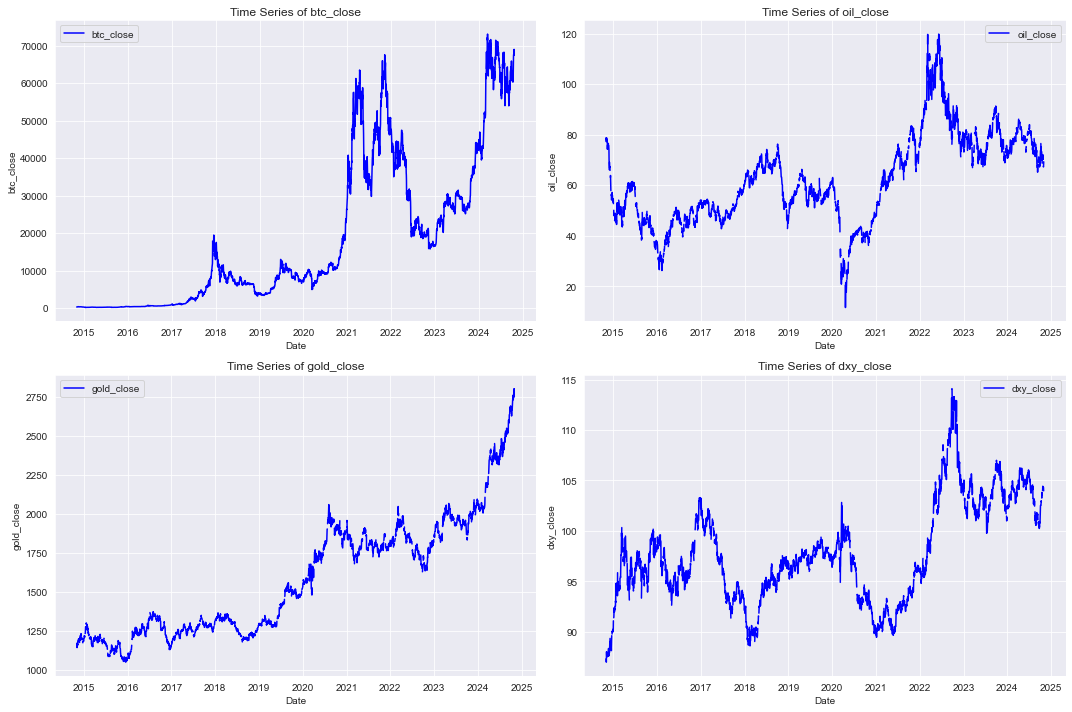

In [18]:
# Set Date as the index for time series analysis
df.set_index('Date', inplace=True)

# Ensure the dataset is sorted by date in ascending order
df = df.sort_index(ascending=True)


# List of variables to analyze
variables = ['btc_close', 'oil_close', 'gold_close', 'dxy_close']

# Plot time series of each variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    plt.plot(df[var], label=var, color='blue')
    plt.title(f"Time Series of {var}")
    plt.xlabel("Date")
    plt.ylabel(var)
    plt.legend()

plt.tight_layout()
plt.show()

#### **Addictive Decomposition**

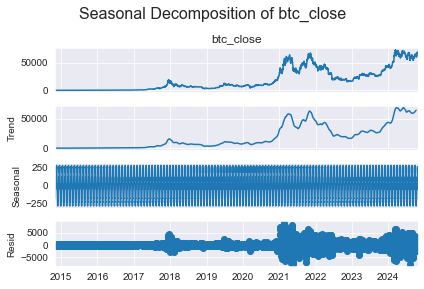

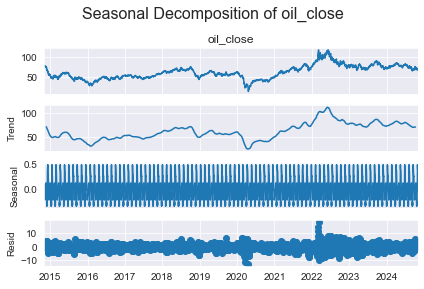

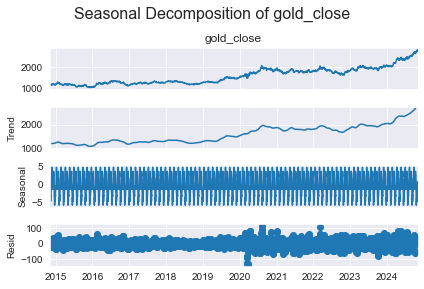

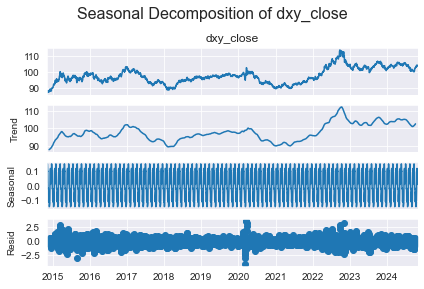

In [19]:
for variable in variables:
    decomposition = seasonal_decompose(df[variable].dropna(), model='additive', period=30)
    fig = decomposition.plot()
    fig.suptitle("") 
    plt.subplots_adjust(top=0.85) 
    plt.gcf().text(0.5, 0.95, f"Seasonal Decomposition of {variable}", fontsize=16, ha='center') 
    plt.show()

#### **Multiplicative Decomposition**

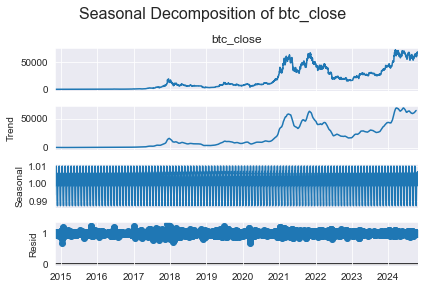

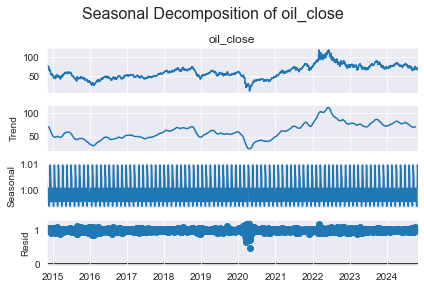

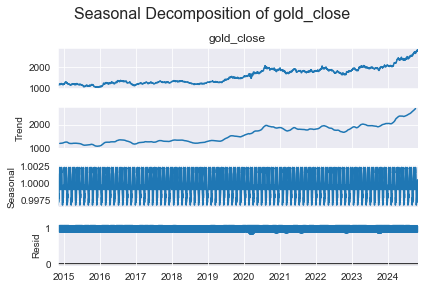

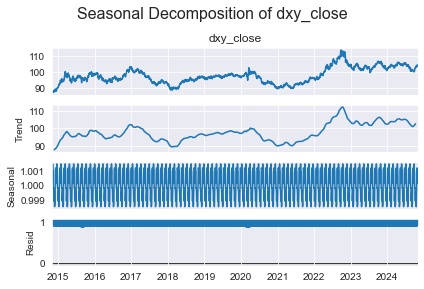

In [20]:
for variable in variables:
    decomposition = seasonal_decompose(df[variable].dropna(), model='multiplicative', period=30)
    fig = decomposition.plot()
    fig.suptitle("") 
    plt.subplots_adjust(top=0.85)  
    plt.gcf().text(0.5, 0.95, f"Seasonal Decomposition of {variable}", fontsize=16, ha='center')  
    plt.show()

### **Outlier Analysis**

Text(0.5, 1.0, 'Outlier Analysis for Oil and Dollar Index')

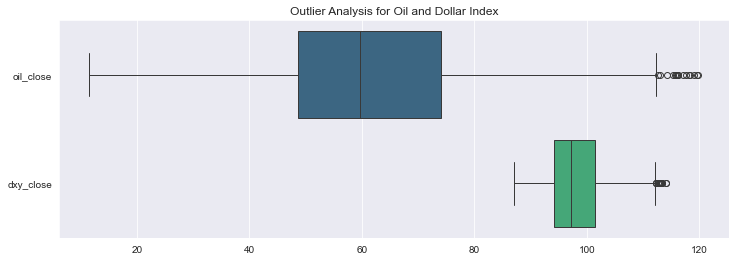

In [21]:
plt.figure(figsize=(12, 4))
sns.boxplot(df[['oil_close', 'dxy_close']], orient='h', palette='viridis')
plt.title('Outlier Analysis for Oil and Dollar Index')

[]

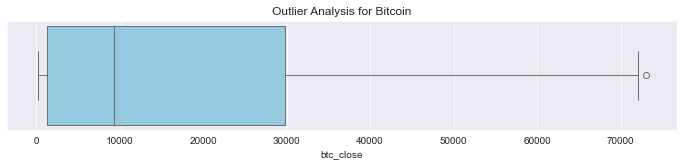

In [22]:
plt.figure(figsize=(12, 2))
sns.boxplot(df['btc_close'], orient='h', color='skyblue' )
plt.title('Outlier Analysis for Bitcoin')
plt.plot()

[]

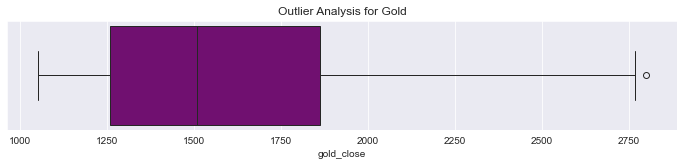

In [23]:
plt.figure(figsize=(12, 2))
sns.boxplot(df['gold_close'], orient='h', color='purple' )
plt.title('Outlier Analysis for Gold')
plt.plot()

### **`Data Preparation`**

Hamed's code here

##### **Imputation missing values using Linear Interpolation and Backward fill**

In [24]:
df.isna().sum()

DoW                0
Month              0
Year               0
btc_open          10
btc_high          10
btc_low           10
btc_close         10
oil_open        1016
oil_high        1016
oil_low         1016
oil_close       1016
gold_open       1089
gold_high       1089
gold_low        1089
gold_close      1089
dxy_open        1043
dxy_high        1043
dxy_low         1043
dxy_close       1043
IS_HOLIDAY         0
IS_WEEKDAY         0
Holiday_Name    3549
dtype: int64

In [25]:
# Imputing missing values in the oil, gold, and dollar data with interpolation
cols = ['btc_open', 'btc_high', 'btc_low', 'btc_close',
        'oil_open', 'oil_high', 'oil_low', 'oil_close',
         'gold_open', 'gold_high', 'gold_low', 'gold_close',
        'dxy_close', 'dxy_open', 'dxy_high', 'dxy_low']

df[cols] = df[cols].interpolate(method='linear', axis=0)

In [26]:
df.head()

,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,oil_close,gold_open,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name
Date,,,,,,,,,,,,,,,,,,,,,,
2014-11-01,Saturday,11,2014,338.65,340.53,321.05,325.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.98,78.08,78.78,1171.1,1173.4,1161.0,1169.8,87.08,87.41,87.02,87.31,0.0,1,NaN
2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.41,75.84,77.19,1164.6,1175.0,1163.4,1167.7,87.25,87.30,86.88,86.98,0.0,1,NaN
2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.35,76.46,78.68,1168.4,1169.3,1137.1,1145.7,87.01,87.61,86.94,87.44,0.0,1,NaN


In [27]:
df.isna().sum()

DoW                0
Month              0
Year               0
btc_open           0
btc_high           0
btc_low            0
btc_close          0
oil_open           2
oil_high           2
oil_low            2
oil_close          2
gold_open          2
gold_high          2
gold_low           2
gold_close         2
dxy_open           2
dxy_high           2
dxy_low            2
dxy_close          2
IS_HOLIDAY         0
IS_WEEKDAY         0
Holiday_Name    3549
dtype: int64

In [28]:
df.head()

,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,oil_close,gold_open,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name
Date,,,,,,,,,,,,,,,,,,,,,,
2014-11-01,Saturday,11,2014,338.65,340.53,321.05,325.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN
2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.98,78.08,78.78,1171.1,1173.4,1161.0,1169.8,87.08,87.41,87.02,87.31,0.0,1,NaN
2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.41,75.84,77.19,1164.6,1175.0,1163.4,1167.7,87.25,87.30,86.88,86.98,0.0,1,NaN
2014-11-05,Wednesday,11,2014,330.68,343.37,330.68,339.49,77.36,79.35,76.46,78.68,1168.4,1169.3,1137.1,1145.7,87.01,87.61,86.94,87.44,0.0,1,NaN


#### **Feature Engineering**
1. **Creating weekly and monthly moving averages**
2. **Creating percentage change for all 4 commoditiies**

In [29]:
## Running Averages for open and close data

# List of price columns
price_cols = ['btc_open', 'btc_close', 'oil_open', 'oil_close', 'gold_open', 'gold_close', 'dxy_open', 'dxy_close']

# Calculate running weekly and monthly averages
for col in price_cols:
    df[f'{col}_weekly_avg'] = df[col].rolling(window=7, min_periods=1).mean()
    df[f'{col}_monthly_avg'] = df[col].rolling(window=30, min_periods=1).mean()

In [30]:
# Calculate rolling avg of daily percentage changes over 7-day and 30-day windows

for asset in price_cols:
    # rolling average percentage change
    df[f'{asset}_weekly_avg_pct_change'] = df[f'{asset}_weekly_avg'].pct_change() * 100
    df[f'{asset}_monthly_avg_pct_change'] = df[f'{asset}_monthly_avg'].pct_change() * 100

In [31]:
# Asset categories and their respective price types
assets = {
    'btc': ['btc_open', 'btc_close', 'btc_high', 'btc_low'],
    'oil': ['oil_open', 'oil_close', 'oil_high', 'oil_low'],
    'gold': ['gold_open', 'gold_close', 'gold_high', 'gold_low'],
    'dxy': ['dxy_open', 'dxy_close', 'dxy_high', 'dxy_low']
}

# Calculate daily percentage changes
for asset, cols in assets.items():
    open_col, close_col, high_col, low_col = cols
    df[f'{asset}_Daily_percentage'] = ((df[close_col] - df[open_col]) / df[open_col] * 100)
    df[f'{asset}_Daily_max_percentage'] = ((df[high_col] - df[open_col]) / df[open_col] * 100)
    df[f'{asset}_Daily_min_percentage'] = ((df[low_col] - df[open_col]) / df[open_col] * 100)

In [32]:
# Calculate intraday volatility as the percentage difference between high and low prices
assets = ['btc', 'oil', 'gold', 'dxy']  

for asset in assets:
    df[f'{asset}_intraday_volatility'] = ((df[f'{asset}_high'] - df[f'{asset}_low']) / df[f'{asset}_open']) * 100

In [33]:
# Calculate rolling volatility of daily percentage changes over 7-day and 30-day windows

for asset in assets:
    # Daily percentage change
    df[f'{asset}_daily_pct_change'] = df[f'{asset}_close'].pct_change() * 100
    
    # Rolling volatility (standard deviation of daily percentage changes)
    df[f'{asset}_rolling_volatility_7'] = df[f'{asset}_daily_pct_change'].rolling(window=7).std()
    df[f'{asset}_rolling_volatility_30'] = df[f'{asset}_daily_pct_change'].rolling(window=30).std()

In [34]:
df.isna().sum()

DoW                                     0
Month                                   0
Year                                    0
btc_open                                0
btc_high                                0
btc_low                                 0
btc_close                               0
oil_open                                2
oil_high                                2
oil_low                                 2
oil_close                               2
gold_open                               2
gold_high                               2
gold_low                                2
gold_close                              2
dxy_open                                2
dxy_high                                2
dxy_low                                 2
dxy_close                               2
IS_HOLIDAY                              0
IS_WEEKDAY                              0
Holiday_Name                         3549
btc_open_weekly_avg                     0
btc_open_monthly_avg              

#### **Shift Target for Forecasting**

In [35]:
df['dxy_future_pct_change'] = df['dxy_daily_pct_change'].shift(-1)

In [36]:
df.head()

,DoW,Month,Year,btc_open,btc_high,btc_low,btc_close,oil_open,oil_high,oil_low,oil_close,gold_open,gold_high,gold_low,gold_close,dxy_open,dxy_high,dxy_low,dxy_close,IS_HOLIDAY,IS_WEEKDAY,Holiday_Name,btc_open_weekly_avg,btc_open_monthly_avg,btc_close_weekly_avg,btc_close_monthly_avg,oil_open_weekly_avg,oil_open_monthly_avg,oil_close_weekly_avg,oil_close_monthly_avg,gold_open_weekly_avg,gold_open_monthly_avg,gold_close_weekly_avg,gold_close_monthly_avg,dxy_open_weekly_avg,dxy_open_monthly_avg,dxy_close_weekly_avg,dxy_close_monthly_avg,btc_open_weekly_avg_pct_change,btc_open_monthly_avg_pct_change,btc_close_weekly_avg_pct_change,btc_close_monthly_avg_pct_change,oil_open_weekly_avg_pct_change,oil_open_monthly_avg_pct_change,oil_close_weekly_avg_pct_change,oil_close_monthly_avg_pct_change,gold_open_weekly_avg_pct_change,gold_open_monthly_avg_pct_change,gold_close_weekly_avg_pct_change,gold_close_monthly_avg_pct_change,dxy_open_weekly_avg_pct_change,dxy_open_monthly_avg_pct_change,dxy_close_weekly_avg_pct_change,dxy_close_monthly_avg_pct_change,btc_Daily_percentage,btc_Daily_max_percentage,btc_Daily_min_percentage,oil_Daily_percentage,oil_Daily_max_percentage,oil_Daily_min_percentage,gold_Daily_percentage,gold_Daily_max_percentage,gold_Daily_min_percentage,dxy_Daily_percentage,dxy_Daily_max_percentage,dxy_Daily_min_percentage,btc_intraday_volatility,oil_intraday_volatility,gold_intraday_volatility,dxy_intraday_volatility,btc_daily_pct_change,btc_rolling_volatility_7,btc_rolling_volatility_30,oil_daily_pct_change,oil_rolling_volatility_7,oil_rolling_volatility_30,gold_daily_pct_change,gold_rolling_volatility_7,gold_rolling_volatility_30,dxy_daily_pct_change,dxy_rolling_volatility_7,dxy_rolling_volatility_30,dxy_future_pct_change
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-11-01,Saturday,11,2014,338.65,340.53,321.05,325.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,338.650,338.650,325.750000,325.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.809243,0.555145,-5.197106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.752252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-02,Sunday,11,2014,326.08,329.05,320.63,325.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,332.365,332.365,325.820000,325.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.855898,-1.855898,0.021489,0.021489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.058268,0.910819,-1.671369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.582188,NaN,NaN,NaN,0.042978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-03,Monday,11,2014,325.57,334.00,325.48,327.55,80.59,80.98,78.08,78.78,1171.1,1173.4,1161.0,1169.8,87.08,87.41,87.02,87.31,0.0,1,NaN,330.100,330.100,326.396667,326.396667,80.590000,80.590000,78.780000,78.780000,1171.100000,1171.100000,1169.800000,1169.800000,87.080000,87.080000,87.310000,87.310000,-0.681480,-0.681480,0.176989,0.176989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.608164,2.589305,-0.027644,-2.245936,0.483931,-3.114530,-0.111007,0.196397,-0.862437,0.264125,0.378962,-0.068902,2.616949,3.598461,1.058834,0.447864,0.509374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.377964
2014-11-04,Tuesday,11,2014,327.16,331.77,325.08,330.49,78.22,78.41,75.84,77.19,1164.6,1175.0,1163.4,1167.7,87.25,87.30,86.88,86.98,0.0,1,NaN,329.365,329.365,327.420000,327.420000,79.405000,79.405000,77.985000,77.985000,1167.850000,1167.850000,1168.750000,1168.750000,87.165000,87.165000,87.145000,87.145000,-0.222660,-0.222660,0.313524,0.313524,-1.470406,-1.470406,-1.009139,-1.009139,-0.277517,-0.277517,-0.089759,-0.089759,0.097611,0.097611,-0.188982,-0.188982,1.017851,1.409096,-0.635775,-1.316799,0.242905,-3.042700,0.266186,0.893010,-0.103040,-0.309456,0.057307,-0.424069,2.044871,3.285605,0.996050,0.481375,0.897573,NaN,NaN,-2.018279,NaN,NaN,-0.179518,NaN,NaN,-0.377964,NaN,NaN,0.528857
2014-11-05,Wednesday,11,2014,330.

In [37]:
df.isna().sum()

DoW                                     0
Month                                   0
Year                                    0
btc_open                                0
btc_high                                0
btc_low                                 0
btc_close                               0
oil_open                                2
oil_high                                2
oil_low                                 2
oil_close                               2
gold_open                               2
gold_high                               2
gold_low                                2
gold_close                              2
dxy_open                                2
dxy_high                                2
dxy_low                                 2
dxy_close                               2
IS_HOLIDAY                              0
IS_WEEKDAY                              0
Holiday_Name                         3549
btc_open_weekly_avg                     0
btc_open_monthly_avg              

In [38]:
df["dxy_daily_pct_change"].fillna(value=0, inplace=True)

In [39]:
df.isna().sum()

DoW                                     0
Month                                   0
Year                                    0
btc_open                                0
btc_high                                0
btc_low                                 0
btc_close                               0
oil_open                                2
oil_high                                2
oil_low                                 2
oil_close                               2
gold_open                               2
gold_high                               2
gold_low                                2
gold_close                              2
dxy_open                                2
dxy_high                                2
dxy_low                                 2
dxy_close                               2
IS_HOLIDAY                              0
IS_WEEKDAY                              0
Holiday_Name                         3549
btc_open_weekly_avg                     0
btc_open_monthly_avg              

In [40]:
# Divide data into X and Y variables
X = df.drop(columns=['dxy_daily_pct_change'])
y = df['dxy_daily_pct_change']

In [41]:
numeric_columns = X.select_dtypes('number').columns
categorical_columns = X.select_dtypes('object').columns

numeric_columns

Index(['Month', 'Year', 'btc_open', 'btc_high', 'btc_low', 'btc_close',
       'oil_open', 'oil_high', 'oil_low', 'oil_close', 'gold_open',
       'gold_high', 'gold_low', 'gold_close', 'dxy_open', 'dxy_high',
       'dxy_low', 'dxy_close', 'IS_HOLIDAY', 'IS_WEEKDAY',
       'btc_open_weekly_avg', 'btc_open_monthly_avg', 'btc_close_weekly_avg',
       'btc_close_monthly_avg', 'oil_open_weekly_avg', 'oil_open_monthly_avg',
       'oil_close_weekly_avg', 'oil_close_monthly_avg', 'gold_open_weekly_avg',
       'gold_open_monthly_avg', 'gold_close_weekly_avg',
       'gold_close_monthly_avg', 'dxy_open_weekly_avg', 'dxy_open_monthly_avg',
       'dxy_close_weekly_avg', 'dxy_close_monthly_avg',
       'btc_open_weekly_avg_pct_change', 'btc_open_monthly_avg_pct_change',
       'btc_close_weekly_avg_pct_change', 'btc_close_monthly_avg_pct_change',
       'oil_open_weekly_avg_pct_change', 'oil_open_monthly_avg_pct_change',
       'oil_close_weekly_avg_pct_change', 'oil_close_monthly_avg_pct_ch

In [42]:
categorical_columns

Index(['DoW', 'Holiday_Name'], dtype='object')

In [43]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

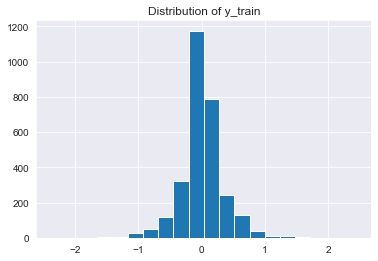

In [44]:
y_train.hist(bins=20)
plt.title('Distribution of y_train')
plt.show()

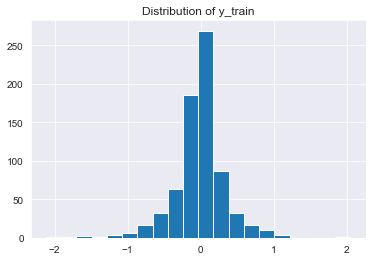

In [45]:
y_test.hist(bins=20)
plt.title('Distribution of y_train')
plt.show()

In [46]:
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler()),
])

categorical_pipeline = Pipeline(steps=[
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder()),
])

preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline, numeric_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_columns)
])

In [47]:
preprocessor

ColumnTransformer(transformers=[('numerical_pipeline',
                                 Pipeline(steps=[('num_imputer',
                                                  SimpleImputer()),
                                                 ('scaler', RobustScaler())]),
                                 Index(['Month', 'Year', 'btc_open', 'btc_high', 'btc_low', 'btc_close',
       'oil_open', 'oil_high', 'oil_low', 'oil_close', 'gold_open',
       'gold_high', 'gold_low', 'gold_close', 'dxy_open', 'dxy_high',
       'dxy_low', 'dxy_close', 'IS_HOLIDAY', 'IS_W...
       'gold_daily_pct_change', 'gold_rolling_volatility_7',
       'gold_rolling_volatility_30', 'dxy_rolling_volatility_7',
       'dxy_rolling_volatility_30', 'dxy_future_pct_change'],
      dtype='object')),
                                ('categorical_pipeline',
                                 Pipeline(steps=[('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['DoW', 'Holiday_Name'], dtype='object'))])

### **`Modelling & Evaluation`**

In [48]:
df['Movement'] = df['dxy_daily_pct_change'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Stable'))

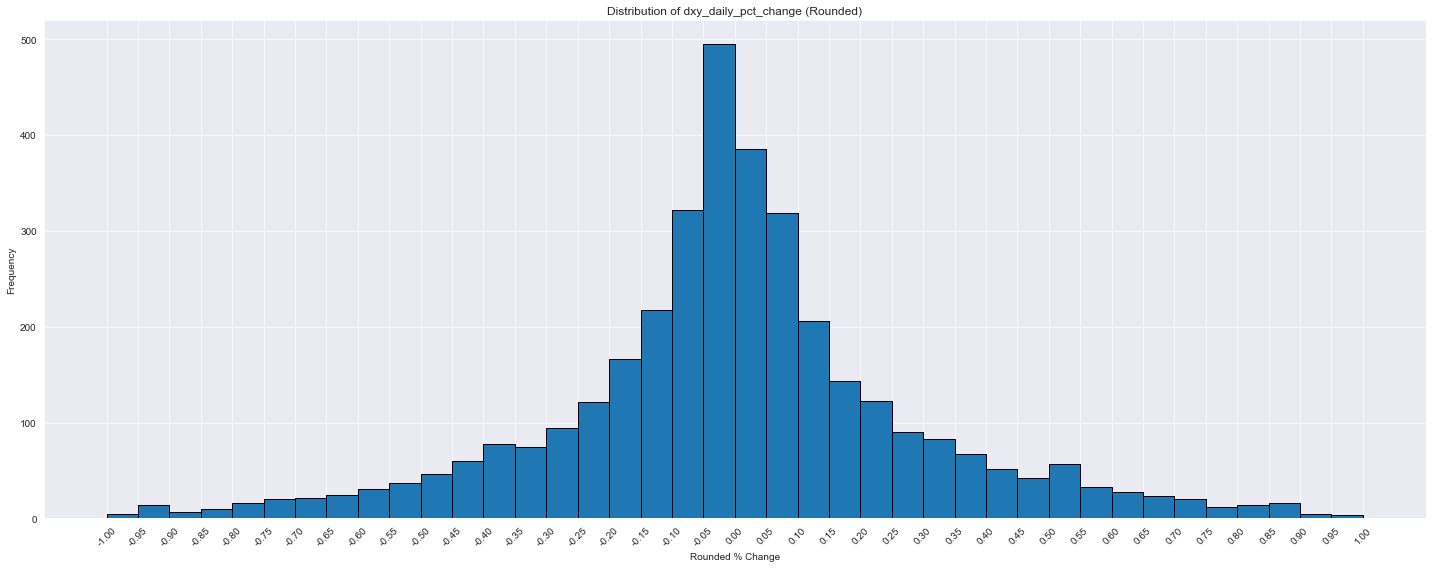

In [49]:
plt.figure(figsize=(20, 8))
# Round the values to two decimal places
df['rounded_pct_change'] = df['dxy_daily_pct_change'].round(2)

# Define the bins for intervals (from -1 to 1 with 0.05 intervals)
bins = np.arange(-1, 1.05, 0.05)

# Plot the histogram for visualization
ax = df['rounded_pct_change'].hist(bins=bins, edgecolor='black')

# Set the x-ticks every 0.05, starting from -0.05
x_ticks = np.arange(-1, 1.05, 0.05)
ax.set_xticks(x_ticks)

# Set the x-tick labels to show only the numbers without ranges
ax.set_xticklabels([f'{tick:.2f}' for tick in x_ticks], rotation=45)

# Display the plot
plt.xlabel('Rounded % Change')
plt.ylabel('Frequency')
plt.title('Distribution of dxy_daily_pct_change (Rounded)')

plt.tight_layout()  # Ensures layout is adjusted to avoid clipping
plt.show()

In [50]:
df['Movement'].value_counts()

Movement
Positive    1425
Negative    1385
Stable       843
Name: count, dtype: int64

In [51]:
df.shape

(3653, 85)

In [52]:
df.isnull().sum()

DoW                                     0
Month                                   0
Year                                    0
btc_open                                0
btc_high                                0
btc_low                                 0
btc_close                               0
oil_open                                2
oil_high                                2
oil_low                                 2
oil_close                               2
gold_open                               2
gold_high                               2
gold_low                                2
gold_close                              2
dxy_open                                2
dxy_high                                2
dxy_low                                 2
dxy_close                               2
IS_HOLIDAY                              0
IS_WEEKDAY                              0
Holiday_Name                         3549
btc_open_weekly_avg                     0
btc_open_monthly_avg              

In [53]:
df = df.drop(columns=['Holiday_Name'])  # Drop the 'Holiday_Name' column
df = df.dropna()  # Drop rows with null values

In [54]:
df = pd.get_dummies(df, columns=['DoW'], drop_first=False)  # One-hot encode 'DoW' column

In [55]:
df.dtypes

Month                                  int64
Year                                   int64
btc_open                             float64
btc_high                             float64
btc_low                              float64
btc_close                            float64
oil_open                             float64
oil_high                             float64
oil_low                              float64
oil_close                            float64
gold_open                            float64
gold_high                            float64
gold_low                             float64
gold_close                           float64
dxy_open                             float64
dxy_high                             float64
dxy_low                              float64
dxy_close                            float64
IS_HOLIDAY                           float64
IS_WEEKDAY                             int64
btc_open_weekly_avg                  float64
btc_open_monthly_avg                 float64
btc_close_

In [56]:
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

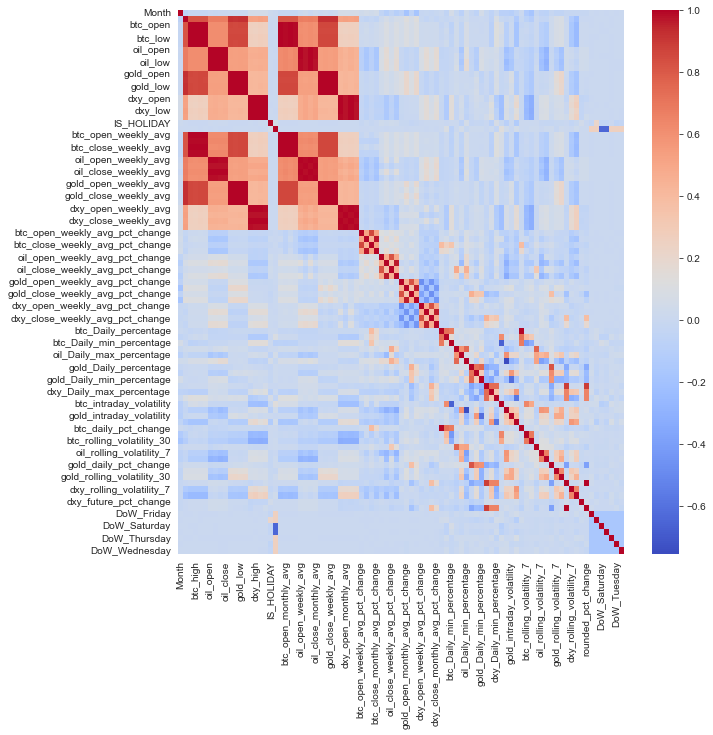

In [57]:
plt.figure(figsize=(10, 10))
corr_matrix = df.drop(columns=['Movement']).corr()

# Plot heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f')
plt.show()

In [58]:
# Compute VIF for each feature
data = add_constant(df.drop(columns=['Movement']))

vif_data = pd.DataFrame()
vif_data['feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
89,DoW_Wednesday,inf
60,gold_Daily_max_percentage,inf
88,DoW_Tuesday,inf
58,oil_Daily_min_percentage,inf
87,DoW_Thursday,inf
57,oil_Daily_max_percentage,inf
55,btc_Daily_min_percentage,inf
54,btc_Daily_max_percentage,inf
85,DoW_Saturday,inf
86,DoW_Sunday,inf


In [59]:
df_final = df[['gold_daily_pct_change','oil_daily_pct_change','btc_daily_pct_change',
 #              'oil_close','gold_close','btc_close',
 #              'oil_open','gold_open','btc_open',
 #              'oil_high','gold_high','btc_high',
 #              'oil_low','gold_low','btc_low',              
#                'oil_close_weekly_avg','gold_close_weekly_avg','btc_close_weekly_avg',     
 #              'oil_close_monthly_avg','gold_close_monthly_avg','btc_close_monthly_avg',
               'Movement','IS_WEEKDAY','IS_HOLIDAY','Month','Year',
               'DoW_Tuesday','DoW_Thursday','DoW_Sunday','DoW_Friday','DoW_Monday',
               'btc_intraday_volatility','oil_intraday_volatility','gold_intraday_volatility',
 #              'btc_Daily_percentage','oil_Daily_percentage','gold_Daily_percentage',
               'btc_rolling_volatility_7','oil_rolling_volatility_7','gold_rolling_volatility_7', 
               'btc_rolling_volatility_30','oil_rolling_volatility_30', 'gold_rolling_volatility_30',
 #              'btc_Daily_max_percentage','oil_Daily_max_percentage','gold_Daily_max_percentage'
 #              'btc_Daily_min_percentage','oil_Daily_min_percentage','gold_Daily_min_percentage' 
 #              'btc_open_weekly_avg_pct_change','oil_open_weekly_avg_pct_change','gold_open_weekly_avg_pct_change',
 #              'btc_open_monthly_avg_pct_change','oil_open_monthly_avg_pct_change','gold_open_monthly_avg_pct_change'
               'btc_close_weekly_avg_pct_change','oil_close_weekly_avg_pct_change','gold_close_weekly_avg_pct_change',
               'btc_close_monthly_avg_pct_change','oil_close_monthly_avg_pct_change','gold_close_monthly_avg_pct_change'
              ]]

In [60]:
# Compute VIF for each feature
data = add_constant(df_final.drop(columns=['Movement']))

vif_data = pd.DataFrame()
vif_data['feature'] = data.columns
vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]

vif_data.sort_values(by='VIF', ascending=False)

,feature,VIF
0,const,532852.693401
4,IS_WEEKDAY,2.913299
16,btc_rolling_volatility_7,2.613075
20,oil_rolling_volatility_30,2.398284
21,gold_rolling_volatility_30,2.337067
17,oil_rolling_volatility_7,2.223181
19,btc_rolling_volatility_30,2.149488
14,oil_intraday_volatility,2.076549
18,gold_rolling_volatility_7,1.852068
13,btc_intraday_volatility,1.813824


[]

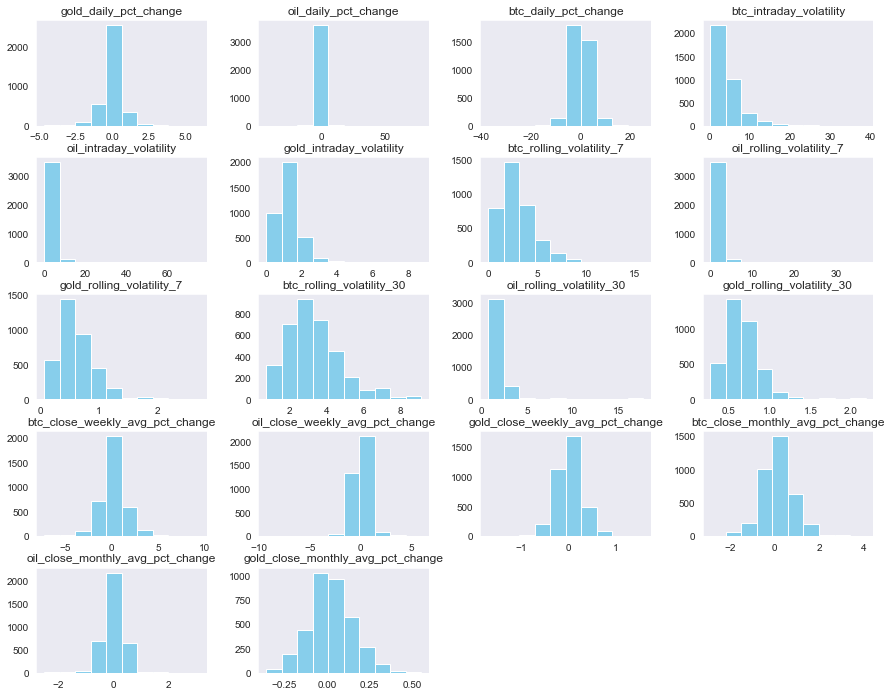

In [61]:
df_final.drop(columns=['Movement','DoW_Tuesday','DoW_Thursday','DoW_Sunday','DoW_Friday','DoW_Monday','Month', 'Year', 'IS_HOLIDAY', 'IS_WEEKDAY']).hist(grid=False, color='skyblue', figsize=(15, 12) )
plt.plot()

In [62]:
# Divide data into X and Y variables
X = df_final.drop(columns=['Movement'])
y = df_final['Movement']

In [63]:
mutual_info_values  = mutual_info_classif(X , y, discrete_features= True )
Columns_to_ = X
mi_df = pd.DataFrame({'Feature': Columns_to_.columns, 'Mutual_Information': mutual_info_values})

mi_df = mi_df.sort_values(by='Mutual_Information', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clusteri

In [64]:
mi_df

,Feature,Mutual_Information
19,oil_rolling_volatility_30,1.073674
26,gold_close_monthly_avg_pct_change,1.073674
16,oil_rolling_volatility_7,1.073674
25,oil_close_monthly_avg_pct_change,1.073674
24,btc_close_monthly_avg_pct_change,1.073674
20,gold_rolling_volatility_30,1.073674
18,btc_rolling_volatility_30,1.073674
17,gold_rolling_volatility_7,1.073674
13,oil_intraday_volatility,1.073291
15,btc_rolling_volatility_7,1.073147


In [65]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True,random_state=123)

In [66]:
y_train.value_counts()

Movement
Positive    1134
Negative    1111
Stable       651
Name: count, dtype: int64

In [67]:
y_test.value_counts()

Movement
Positive    278
Negative    259
Stable      187
Name: count, dtype: int64

In [68]:
input_features = X.columns
input_features

Index(['gold_daily_pct_change', 'oil_daily_pct_change', 'btc_daily_pct_change',
       'IS_WEEKDAY', 'IS_HOLIDAY', 'Month', 'Year', 'DoW_Tuesday',
       'DoW_Thursday', 'DoW_Sunday', 'DoW_Friday', 'DoW_Monday',
       'btc_intraday_volatility', 'oil_intraday_volatility',
       'gold_intraday_volatility', 'btc_rolling_volatility_7',
       'oil_rolling_volatility_7', 'gold_rolling_volatility_7',
       'btc_rolling_volatility_30', 'oil_rolling_volatility_30',
       'gold_rolling_volatility_30', 'btc_close_weekly_avg_pct_change',
       'oil_close_weekly_avg_pct_change', 'gold_close_weekly_avg_pct_change',
       'btc_close_monthly_avg_pct_change', 'oil_close_monthly_avg_pct_change',
       'gold_close_monthly_avg_pct_change'],
      dtype='object')

In [69]:
input_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
])


preprocessor = ColumnTransformer(transformers=[
    ('numerical_pipeline', input_pipeline, input_features),
    ])

In [70]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [71]:
models = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('SVC', SVC(random_state=42, probability=True)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('Bagging Classifier', BaggingClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0)),
    ('LightGBM', LGBMClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('Extra Trees', ExtraTreesClassifier(random_state=42)),
    ('Neural Network', MLPClassifier(random_state=42, max_iter=500))
]

In [72]:
# Create an ensemble model using majority voting (or weighted voting if you prefer)
voting_estimators = [
     ('Random Forest', RandomForestClassifier(random_state=42)),
     ('Logistic Regression', LogisticRegression(random_state=42)),
     ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
#     ('SVC', SVC(probability=True, random_state=42))   
     ('CatBoost', CatBoostClassifier(random_state=42, verbose=0)),
#     ('LightGBM', LGBMClassifier(random_state=42)),
]

ensemble_model = VotingClassifier(estimators=voting_estimators, voting='soft')

# Add ensemble model to the models list
models.append(('Voting Classifier', ensemble_model))

In [73]:
base_learners = [
#    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')),
#    ('SVC', SVC(probability=True, random_state=42))
]

meta_learner = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

stacking_classifier = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

models.append(('Stacking Classifier', stacking_classifier))

In [74]:
selection = SelectKBest(mutual_info_classif, k='all')

fi_smote_df = pd.DataFrame(columns=['Model_name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

all_pipelines = {}

for model_name, classifier in models:

    pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_importance', selection),
    ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train_encoded)

    all_pipelines[model_name] = pipeline

    smote_y_pred = pipeline.predict(X_test)

    fi_smote_dict = classification_report(y_test_encoded, smote_y_pred, output_dict=True)

    acccuracy = fi_smote_dict['accuracy']
    precision = fi_smote_dict['weighted avg']['precision']
    recall = fi_smote_dict['weighted avg']['recall']
    f1_score = fi_smote_dict['weighted avg']['f1-score']

    fi_smote_df.loc[len(fi_smote_df)] = [model_name, acccuracy, precision, recall, f1_score]


fi_smote_df.sort_values(by='Accuracy', ascending=False)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4625
[LightGBM] [Info] Number of data points in the train set: 2896, number of used features: 27
[LightGBM] [Info] Start training from score -0.958070
[LightGBM] [Info] Start training from score -0.937579
[LightGBM] [Info] Start training from score -1.492576


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [19:29:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [19:29:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [19:29:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740

,Model_name,Accuracy,Precision,Recall,F1_Score
2,Random Forest,0.544199,0.543339,0.544199,0.534501
8,CatBoost,0.537293,0.536158,0.537293,0.532783
12,Extra Trees,0.535912,0.534332,0.535912,0.533549
1,SVC,0.534530,0.538687,0.534530,0.535420
7,Gradient Boosting,0.527624,0.524707,0.527624,0.522860
3,Logistic Regression,0.516575,0.524385,0.516575,0.518088
9,LightGBM,0.516575,0.513213,0.516575,0.511143
6,AdaBoost,0.515193,0.514105,0.515193,0.501666
4,XGBoost,0.513812,0.511477,0.513812,0.510959
14,Voting Classifier,0.509669,0.507501,0.509669,0.507494


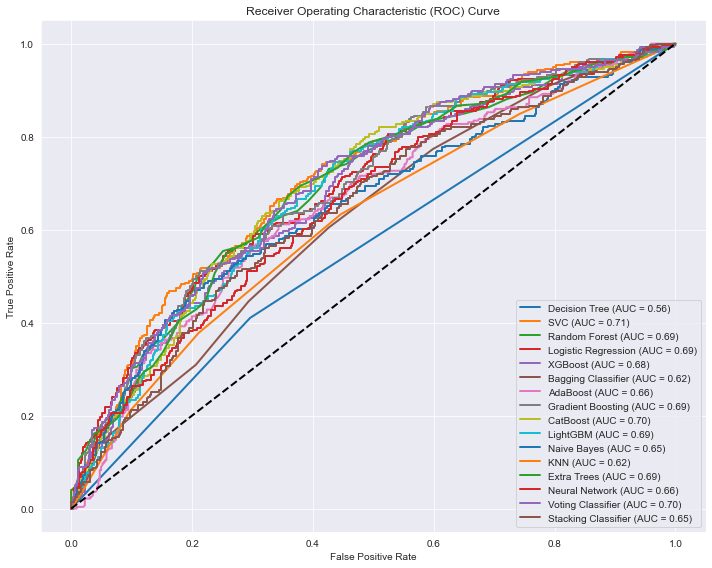

In [75]:
# Initialize the figure
plt.figure(figsize=(10, 8))

# Loop through each model and plot its ROC curve
for model_name, pipeline in all_pipelines.items():
    # Predict probabilities for the positive class (Class 1)
    y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test_encoded, y_prob, pos_label=1)  # Positive class = 1
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    
    # Plot the ROC curve for each model
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (Random classifier line)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Set plot labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


In [76]:
catboost_pipeline = all_pipelines['CatBoost']
catboost_smote_y_pred = catboost_pipeline.predict(X_test)
catboost_model = catboost_pipeline.named_steps['classifier']

In [77]:
XGBoost_pipeline = all_pipelines['XGBoost']
XGBoost_smote_y_pred = XGBoost_pipeline.predict(X_test)
XGBoost_model = XGBoost_pipeline.named_steps['classifier']

In [78]:
voting_pipeline = all_pipelines['Voting Classifier']
voting_smote_y_pred = voting_pipeline.predict(X_test)
voting_model = voting_pipeline.named_steps['classifier']

In [79]:
forest_pipeline = all_pipelines['Random Forest']
forest_smote_y_pred = forest_pipeline.predict(X_test)
forest_model = forest_pipeline.named_steps['classifier']

In [80]:
print(label_encoder.classes_)  # Shows the class names in order of their indices

print(catboost_model.classes_)  # For models that expose class labels

['Negative' 'Positive' 'Stable']
[0 1 2]


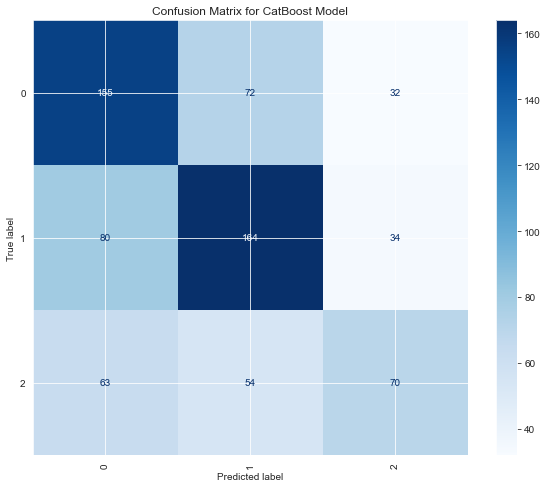

In [81]:
cm = confusion_matrix(y_test_encoded, catboost_smote_y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost_pipeline.named_steps['classifier'].classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.gcf().set_size_inches(10, 8)  # Increase figure size
plt.title("Confusion Matrix for CatBoost Model")
plt.show()

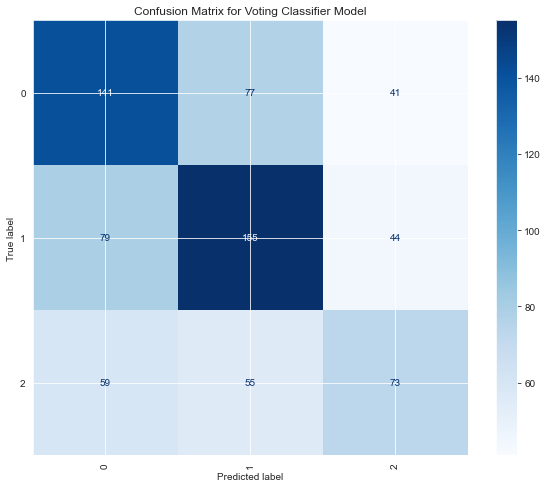

In [82]:
cm = confusion_matrix(y_test_encoded, voting_smote_y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=voting_pipeline.named_steps['classifier'].classes_)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.gcf().set_size_inches(10, 8)  # Increase figure size
plt.title("Confusion Matrix for Voting Classifier Model")
plt.show()

In [83]:
# Get feature importance
feature_importances = catboost_model.get_feature_importance()

# Retrieve feature names from the preprocessor
feature_names = catboost_pipeline.named_steps['preprocessor'].transformers_[0][2]

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(fi_df)

                              Feature  Importance
0               gold_daily_pct_change   12.230240
1                oil_daily_pct_change    7.271785
17          gold_rolling_volatility_7    5.411716
22    oil_close_weekly_avg_pct_change    5.198535
16           oil_rolling_volatility_7    5.090386
24   btc_close_monthly_avg_pct_change    4.916841
25   oil_close_monthly_avg_pct_change    4.875775
23   gold_close_weekly_avg_pct_change    4.827392
13            oil_intraday_volatility    4.801022
19          oil_rolling_volatility_30    4.427354
20         gold_rolling_volatility_30    4.141155
18          btc_rolling_volatility_30    4.106514
26  gold_close_monthly_avg_pct_change    3.957786
14           gold_intraday_volatility    3.955385
21    btc_close_weekly_avg_pct_change    3.791708
5                               Month    3.439859
12            btc_intraday_volatility    3.435832
15           btc_rolling_volatility_7    3.390783
2                btc_daily_pct_change    3.088685


In [84]:
fi_df['Importance'].sum()

100.0

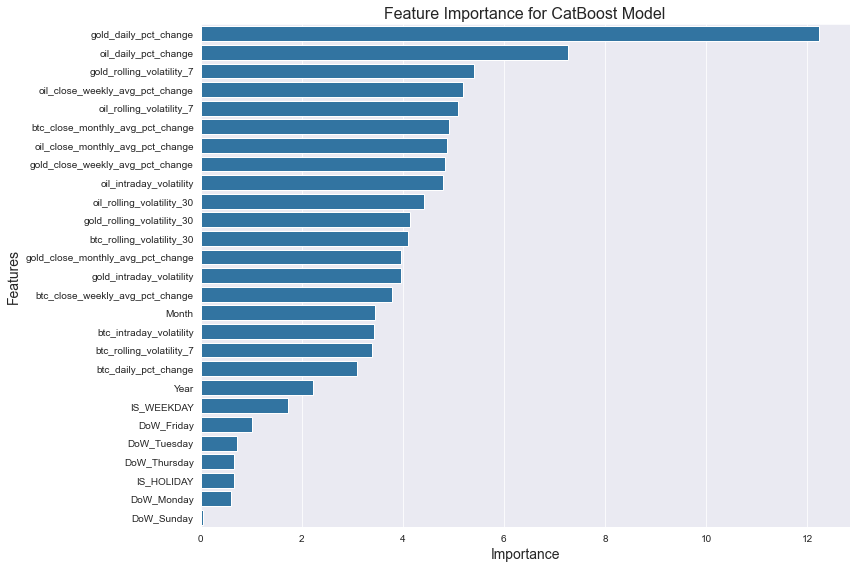

In [85]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title("Feature Importance for CatBoost Model", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()

In [86]:
# Get feature importance
feature_importances = XGBoost_model.feature_importances_

# Retrieve feature names from the preprocessor
feature_names = XGBoost_pipeline.named_steps['preprocessor'].transformers_[0][2]

fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(fi_df)

                              Feature  Importance
4                          IS_HOLIDAY    0.136165
11                         DoW_Monday    0.098025
3                          IS_WEEKDAY    0.093740
0               gold_daily_pct_change    0.060736
6                                Year    0.034644
13            oil_intraday_volatility    0.033467
5                               Month    0.032211
1                oil_daily_pct_change    0.031676
20         gold_rolling_volatility_30    0.031672
17          gold_rolling_volatility_7    0.030692
7                         DoW_Tuesday    0.029532
18          btc_rolling_volatility_30    0.028549
19          oil_rolling_volatility_30    0.028488
16           oil_rolling_volatility_7    0.028398
15           btc_rolling_volatility_7    0.027689
24   btc_close_monthly_avg_pct_change    0.026453
25   oil_close_monthly_avg_pct_change    0.025224
21    btc_close_weekly_avg_pct_change    0.025158
26  gold_close_monthly_avg_pct_change    0.025068


In [87]:
# Get feature importance (corrected method name)
feature_importances = forest_model.feature_importances_

# Retrieve feature names from the preprocessor
feature_names = voting_pipeline.named_steps['preprocessor'].transformers_[0][2]

# Create a DataFrame for feature importance
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(fi_df)

                              Feature  Importance
0               gold_daily_pct_change    0.125970
1                oil_daily_pct_change    0.055480
13            oil_intraday_volatility    0.053994
23   gold_close_weekly_avg_pct_change    0.050032
17          gold_rolling_volatility_7    0.049671
16           oil_rolling_volatility_7    0.046251
19          oil_rolling_volatility_30    0.045236
25   oil_close_monthly_avg_pct_change    0.044938
22    oil_close_weekly_avg_pct_change    0.044535
14           gold_intraday_volatility    0.044294
24   btc_close_monthly_avg_pct_change    0.043756
20         gold_rolling_volatility_30    0.043540
18          btc_rolling_volatility_30    0.043430
26  gold_close_monthly_avg_pct_change    0.043102
15           btc_rolling_volatility_7    0.041311
21    btc_close_weekly_avg_pct_change    0.040799
2                btc_daily_pct_change    0.039263
12            btc_intraday_volatility    0.037799
5                               Month    0.029686


In [88]:
feature_importances = {}

# Assuming X_train is a DataFrame with column names (features)
feature_names = X_train.columns

# Collect feature importances for models that support feature_importances_
for clf_name, clf in ensemble_model.named_estimators_.items():
    if hasattr(clf, 'feature_importances_'):  # RandomForest, XGB support this
        importances = clf.feature_importances_
        fi_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        feature_importances[clf_name] = fi_df

# For LogisticRegression and SVC, use coefficients (only for linear classifiers)
for clf_name, clf in ensemble_model.named_estimators_.items():
    if hasattr(clf, 'coef_'):  # LogisticRegression and linear SVC support this
        importances = clf.coef_[0]  # Take the first row of coefficients
        fi_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values(by='Importance', ascending=False)
        feature_importances[clf_name] = fi_df

# Now, display the DataFrames for each model
for clf_name, fi_df in feature_importances.items():
    print(f"Feature importances for {clf_name}:")
    print(fi_df)
    print()


Feature importances for Random Forest:
                              Feature  Importance
0               gold_daily_pct_change    0.125970
1                oil_daily_pct_change    0.055480
13            oil_intraday_volatility    0.053994
23   gold_close_weekly_avg_pct_change    0.050032
17          gold_rolling_volatility_7    0.049671
16           oil_rolling_volatility_7    0.046251
19          oil_rolling_volatility_30    0.045236
25   oil_close_monthly_avg_pct_change    0.044938
22    oil_close_weekly_avg_pct_change    0.044535
14           gold_intraday_volatility    0.044294
24   btc_close_monthly_avg_pct_change    0.043756
20         gold_rolling_volatility_30    0.043540
18          btc_rolling_volatility_30    0.043430
26  gold_close_monthly_avg_pct_change    0.043102
15           btc_rolling_volatility_7    0.041311
21    btc_close_weekly_avg_pct_change    0.040799
2                btc_daily_pct_change    0.039263
12            btc_intraday_volatility    0.037799
5          

In [89]:
feature_importances = {}
feature_names = X_train.columns  # Assuming X_train is a DataFrame with column names

for clf_name, clf in ensemble_model.named_estimators_.items():
    if hasattr(clf, 'feature_importances_'):  # RandomForest, XGB support this
        feature_importances[clf_name] = clf.feature_importances_

# For LogisticRegression and SVC, use coefficients (only for linear classifiers)
for clf_name, clf in ensemble_model.named_estimators_.items():
    if hasattr(clf, 'coef_'):  # LogisticRegression and linear SVC support this
        feature_importances[clf_name] = clf.coef_[0]  # Take the first row of coefficients

# Now, calculate the average of the feature importances
# First, collect all feature importances into a list for averaging
importances_list = []
for clf_name, importances in feature_importances.items():
    importances_list.append(importances)

# Ensure all importances have the same length (if not, handle it accordingly)
# If models have different numbers of features, they won't align
# Here we'll assume all models output the same number of features

# Convert the list to a numpy array for easy manipulation
importances_array = np.array(importances_list)

# Calculate the average of the feature importances (axis=0 averages across all models)
average_importances = np.mean(importances_array, axis=0)

# Create a DataFrame with feature names and their average importance
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Average Importance': average_importances
}).sort_values(by='Average Importance', ascending=False)

# Display the averaged feature importances
print(fi_df)

                              Feature  Average Importance
0               gold_daily_pct_change            3.180941
1                oil_daily_pct_change            1.843460
17          gold_rolling_volatility_7            1.411516
22    oil_close_weekly_avg_pct_change            1.319764
16           oil_rolling_volatility_7            1.288064
23   gold_close_weekly_avg_pct_change            1.252952
13            oil_intraday_volatility            1.251139
25   oil_close_monthly_avg_pct_change            1.243537
24   btc_close_monthly_avg_pct_change            1.242881
19          oil_rolling_volatility_30            1.133338
18          btc_rolling_volatility_30            1.045221
20         gold_rolling_volatility_30            1.018328
14           gold_intraday_volatility            1.013229
26  gold_close_monthly_avg_pct_change            0.995101
21    btc_close_weekly_avg_pct_change            0.962263
5                               Month            0.912724
12            

Partial Dependence Plot for Class 0 - Negative


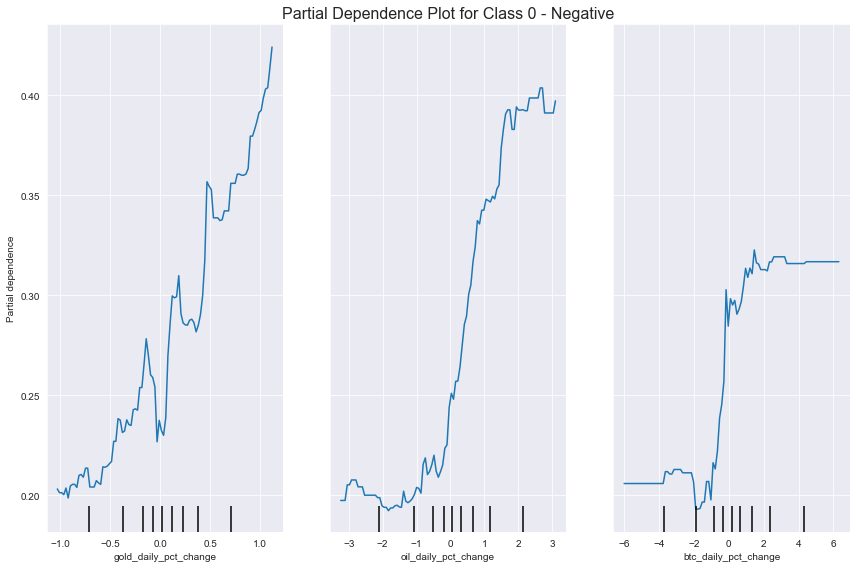

Partial Dependence Plot for Class 1 - Positive


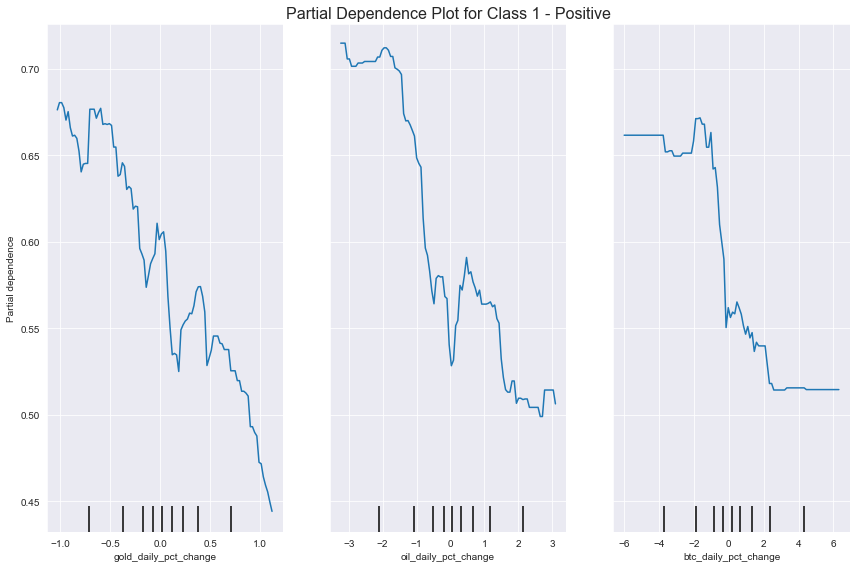

Partial Dependence Plot for Class 2 - Stable


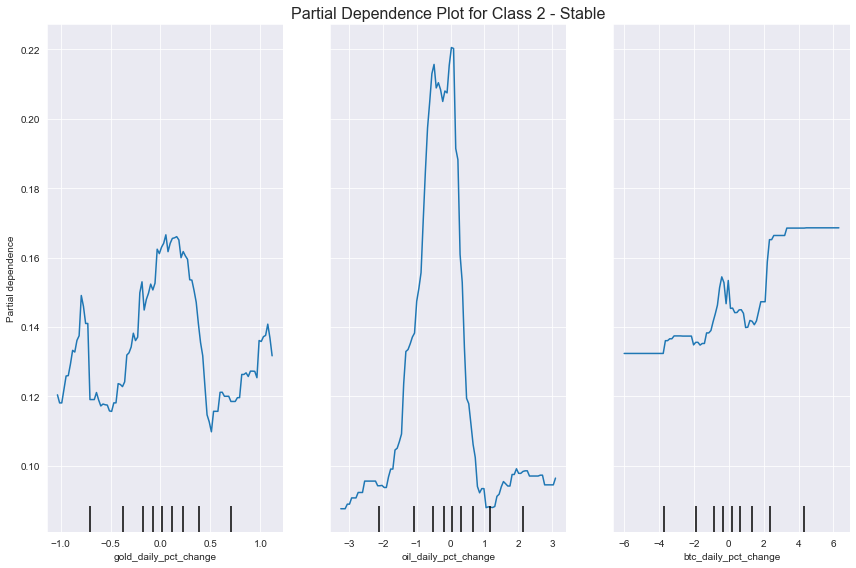

In [90]:
# Define the features for which you want to plot PDPs
features_to_plot = ['gold_daily_pct_change', 'oil_daily_pct_change', 'btc_daily_pct_change']

# Define class labels
class_labels = ['Negative', 'Positive', 'Stable']

# Loop through all class indices and generate PDPs
for class_idx, label in enumerate(class_labels):
    print(f"Partial Dependence Plot for Class {class_idx} - {label}")

    # Create a figure with custom size
    fig, ax = plt.subplots(figsize=(12, 8))

    # Generate Partial Dependence Plot
    PartialDependenceDisplay.from_estimator(
        catboost_model,  # Your trained CatBoost model
        X_train,         # The training data used for fitting the model
        features=features_to_plot,  # Features for which you want the PDP
        target=class_idx,  # Specify which class (0: Negative, 1: Positive, 2: Stable)
        ax=ax  # Pass the custom axis for better control over the plot
    )

    # Customize the title for each class
    ax.set_title(f"Partial Dependence Plot for Class {class_idx} - {label}", fontsize=16)
    plt.tight_layout()  # Adjust the layout to avoid overlap
    plt.show()  # Display the plot

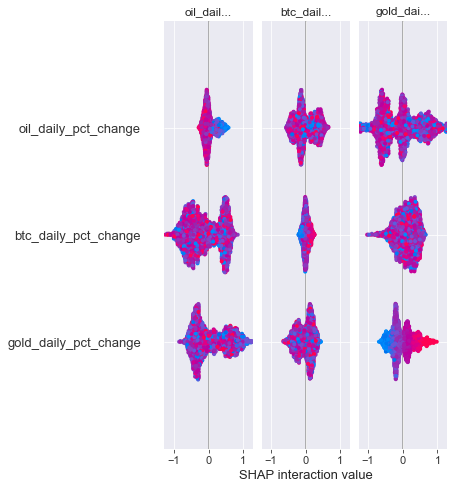

<Figure size 1008x720 with 0 Axes>

In [91]:
# Create SHAP explainer
explainer = shap.TreeExplainer(catboost_model)

# Calculate SHAP values for the scaled data (X_train is the scaled data)
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Now adjust the size of the plot after it is generated
plt.gcf().set_size_inches(14, 10)  # Adjust this to your desired size

# Show the plot with the adjusted size
plt.show()